## PLOTTING GENERALISATION ERROR DELTA

In [2]:
import scipy as sp
from mpl_toolkits import mplot3d
import glob as glob
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

### LOAD CSV FILES

In [2]:
#WARNING! MAKE SURE TO PLACE THIS FILE INSIDE THE RESULTS FOLDER IN THE RUN DIRECTORY

file_list=glob.glob("similarity_*/0/*.csv")

In [3]:
GoodDataFiles=[]
for i in range(len(file_list)):
    file_name=file_list[i]
    with open(file_name, 'r') as file:  #opens and reads each file
        line1=file.readline()           #reads the first line in each file
        #print(line1)
        line1_split=line1.split(',')    #separates the first line into individual elements
        if 'delta_0' in line1_split:
            GoodDataFiles.append(file_name)

In [10]:
xdata = []
ydata = []
zdata_d0 = []
zdata_d1 = []

for i in range(len(GoodDataFiles)):
    file_name = GoodDataFiles[i]
    result_csv = pd.read_csv(file_name)
    last = result_csv.shape[0] - 1 #Find the last row of the results, -1 to account for header
    delta0 = result_csv['delta_0'][last]
    delta1 = result_csv['delta_1'][last]
    name = GoodDataFiles[i].split("/")[0]
    mask_prop = name.split("_")[1]
    resample_prob = name.split("_")[2]
    zdata_d0.append(delta0)
    zdata_d1.append(delta1)
    xdata.append(mask_prop)
    ydata.append(resample_prob)

### 3D PLOTS

#### DELTA 0

<IPython.core.display.Javascript object>


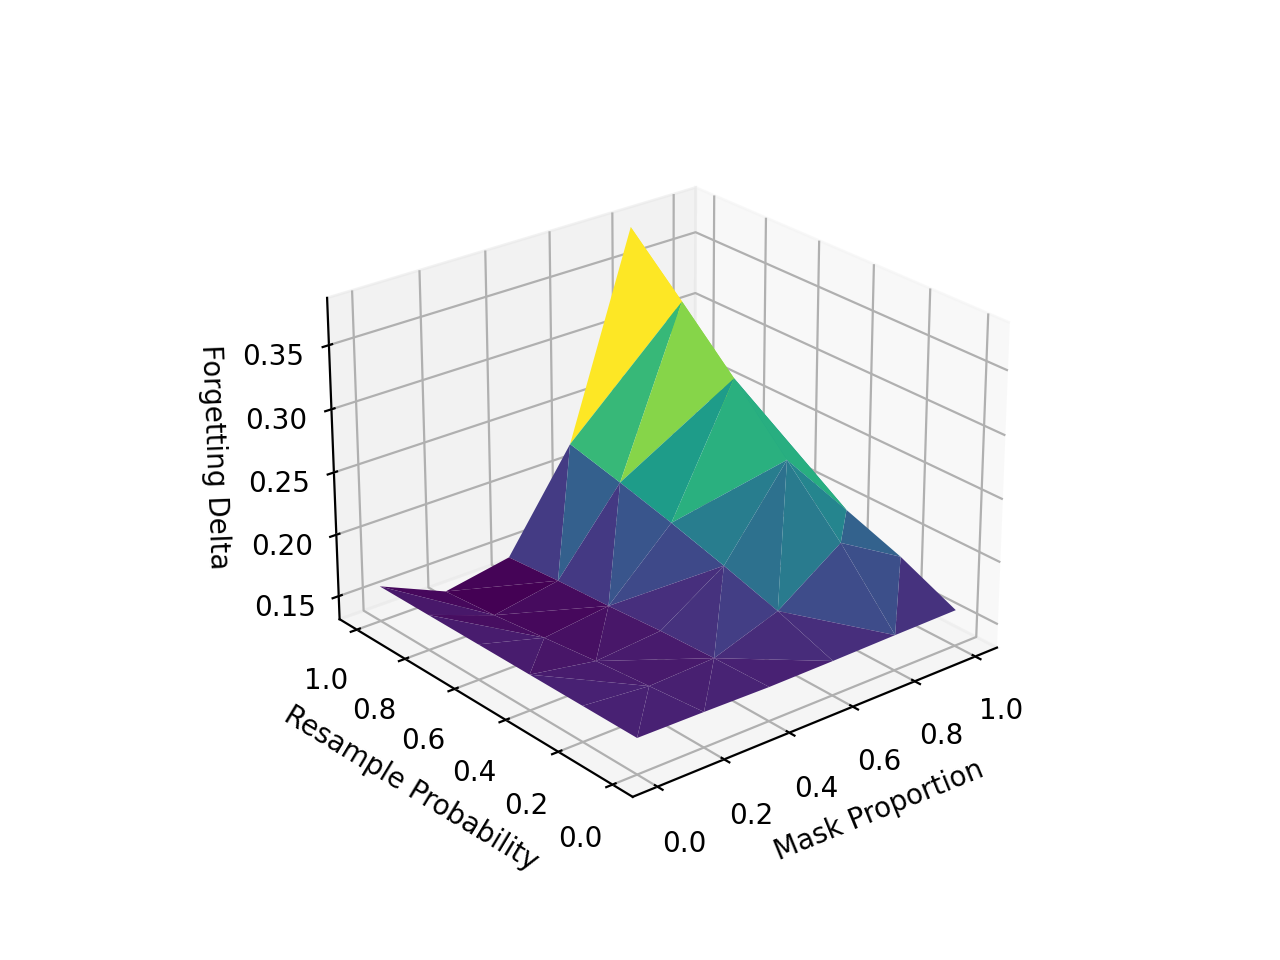

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.plot_trisurf(xdata, ydata, zdata_d0,
                cmap='viridis', edgecolor='none');
ax.set_zlabel('Forgetting Delta', rotation=angle)
ax.set_xlabel("Mask Proportion")
ax.set_ylabel("Resample Probability")
ax.set_title('DELTA 0')
plt.show()

#### DELTA 1

In [1]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xdata, ydata, zdata_d1,
                cmap='viridis', edgecolor='none')
ax.set_zlabel('Forgetting Delta', rotation=angle)
ax.set_xlabel("Mask Proportion")
ax.set_ylabel("Resample Probability")
ax.set_title('DELTA 1')
plt.show()
    

NameError: name 'plt' is not defined

### MAKE 2D PLOTS

#### DELTA 0

In [ ]:
#RESAMPLE PROBABILITY
plt.plot(ydata, zdata_d0, c = xdata)
plt.xlabel('RESAMPLE PROBABILITY')
plt.ylabel('FORGETTING')
plt.title('TASK 0')
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
#MASKING PROPORTION
plt.plot(xdata, zdata_d0, c = ydata)
plt.xlabel('MASKING PROPORTION')
plt.ylabel('FORGETTING')
plt.title('TASK 0')
plt.grid()
plt.colorbar()
plt.show()

#### DELTA 1

In [ ]:
#RESAMPLE PROBABILITY
plt.plot(ydata, zdata_d1, c = xdata)
plt.xlabel('RESAMPLE PROBABILITY')
plt.ylabel('FORGETTING')
plt.title('TASK 1')
plt.grid()
plt.colorbar()
plt.show()

In [ ]:
#MASKING PROPORTION
plt.plot(xdata, zdata_d1, c = ydata)
plt.xlabel('MASKING PROPORTION')
plt.ylabel('FORGETTING')
plt.title('TASK 1')
plt.grid()
plt.colorbar()
plt.show()